# Week 11: Networks 3 (epidemiology)


## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np
import pandas as pd

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

1) 

You need two equations.

2)

The first one describes the rate at which persons (nodes) transfers from being susceptible to being infected.
The second one descries the rate at which they go from being infected to being susceptible.

3) 

beta is the probability that each infected person has to infect each of the suspectible persons. So say there are
2 suspectible persons and 2 infected persons. The first infected person has beta probability of infecting the first suspectible person and also beta probability of infecting the second suspectible person - 2*beta probability of infecting somebody. The same goes for the second infected person, so the expected number of infected persons are 4*beta (beta*S*I)

gamma is the probability that an infected person recovers (at the given timestep). Thus the total expected number of person recovering at the given timestep is gamma*I.

If a disease has a really big gamma, it means, that people tend to recover quickly. If it has a small gamma people tend to recover slowly. If it has a big beta it is very contagious.

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

1) 

In strategy A: around 70%. Strategy B: around 20%. Strategy C: around 50%

2) 

Strategy C takes advantage of the friendship paradox, that states that your friends on average have more friends than yourself. This is due to the fact, that people with more friends have a higher "weight" in the calculation of the average, since they are counted as a friend more times than an individual with less friends.
Regarding strategy C - if we pick a random individual and pick a random friend of that individual, the probability that this friend is popular (has many connections/friends) is relatively large - larger than average, and thus larger than the probability of being chosen at random. Thus we will on average choose more connected individuals which is very beneficial in terms of diluting the network.

3) 

Because the ER network is a random network where all nodes have the same expected degree, so it tend to have less hubs - nodes with high degrees - than a BA network.


> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

The explorable models a SIRS epidemic. That is, a susceptible individual can be infected after which it will recover at a specified rate and then turn susceptible again at another rate. When the individual is in recovered mode, it cannot be infected. Thus, this mimics a seasonal flu well - once recovered you cannot get the flu again, but it can mutate after some time, and you can be infected again.
In addition to the two mentioned rates, the model also has the option to alter the transmission rate and to add multiple populations that the individuals transfer between at a given migration rate. If the transmission rate is set to a high rate, and the recovery rate and the waning immunity rate are set low, the disease will spread rapidly. Also the migration rate is important, since a population can stay susceptible, even though the other population might be 100% infected, if the migration rate is low enough.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [2]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

[Text(0, 0.5, 'Infected ratio'),
 Text(0.5, 0, 'Timestep'),
 Text(0.5, 1.0, 'SIRS epidemic')]

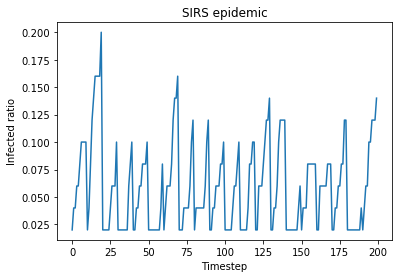

In [4]:
# the probability of being infected if you are a neighbor to an infected individual
p_I = 0.1
# number of timesteps
n_iter = 200

# initialize network with all individuals as susceptible
I = set()
S = set(G.nodes())

# pick patient 0 as a random individual from the list of susceptibles
patient0 = np.random.choice(list(S))

# add that individual to the list of infected and remove from list of susceptibles
I.add(patient0)
S.remove(patient0)

# set reset timestep
T_I = 10

ratio_ls = []
# loop over timesteps
for t in range(n_iter):
    
    #print('timestep {}'.format(t))
    
    # loop over infected individuals
    for infected_node in list(I):
        # find all neighbors for that given infected individual
        neighbors = G.neighbors(infected_node)
        # with p_I percent probability add each neighbor to a set
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors

    if t in np.linspace(0, 200, int(200/T_I), endpoint=False):
        I = set()
        S = set(G.nodes())
        patient0 = np.random.choice(list(S))
        I.add(patient0)
        S.remove(patient0)
    
    #print(len(S), len(I))
    
    ratio = len(I)/(len(S)+len(I))
    ratio_ls.append(ratio)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,200), ratio_ls)
ax.set(title= 'SIRS epidemic',
       xlabel = 'Timestep',
       ylabel = 'Infected ratio')

The result makes sense, the infected ratio has a hard time passing 20% - this is due to the fact, that the disease uses quite a few timesteps to get the first 5 or so infections (which are the hardest) and then it gets interrupted by the reset.

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

[Text(0, 0.5, 'Infected ratio'),
 Text(0.5, 0, 'Timestep'),
 Text(0.5, 1.0, 'SIRS epidemic in Facebook network')]

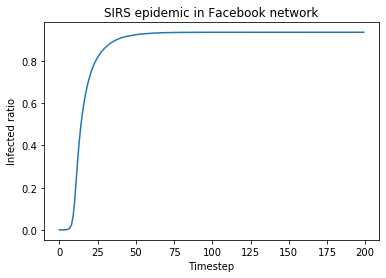

In [7]:

# load data:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

# Count the number of times each link occurs and store that in a new 'weight' column
data2 = data.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.Graph` from this dataframe
G = nx.from_pandas_edgelist(data2, 'user1', 'user2', 'weight', create_using=nx.Graph)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

# initialize network with all individuals as susceptible
I = set()
S = set(G.nodes())

# pick patient 0 as a random individual from the list of susceptibles
patient0 = np.random.choice(list(S))

# add that individual to the list of infected and remove from list of susceptibles
I.add(patient0)
S.remove(patient0)

# set reset timestep
#T_I = 10

ratio_ls = []
# loop over timesteps
for t in range(n_iter):

    # loop over infected individuals
    for infected_node in list(I):
        # find all neighbors for that given infected individual
        neighbors = G.neighbors(infected_node)
        # with p_I percent probability add each neighbor to a set
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors

    #if t in np.linspace(0, 200, int(200/T_I), endpoint=False):
    #    I = set()
    #    S = set(G.nodes())
    #    patient0 = np.random.choice(list(S))
    #    I.add(patient0)
    #    S.remove(patient0)

    ratio = len(I)/(len(S)+len(I))
    ratio_ls.append(ratio)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,200), ratio_ls)
ax.set(title= 'SIRS epidemic in Facebook network',
       xlabel = 'Timestep',
       ylabel = 'Infected ratio')

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".